<a href="https://colab.research.google.com/github/Sandeep-Kulukuri/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [134]:
import numpy as np #For numerical operation, Linear Algebra
import pandas as pd # For dataset operations and analysis
#Visualization tools
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
#  With this backend, the output of plotting commands is displayed inline within frontends
#  directly below the code cell that produced it. 
#  The resulting plots will then also be stored in the notebook document.
import warnings
warnings.filterwarnings("ignore")# suppress all warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Reading the dataset CSV file
hotel_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter_datasets/Hotel Bookings.csv')

df = hotel_df
#Printing the first 5 rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [131]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,4
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,4
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,151.20,0,2,Check-Out,2017-09-07,7


In [ ]:
import sweetviz
df_analysis = sweetviz.analyze(df)
#display the report

df_analysis.show_html('hotel_df_analysis.html')


                                             |          | [  0%]   00:00 -> (? left)

Report hotel_df_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#**Dataset** **Analysis**

**1) hotel**

Categories
1.   City Hotel
2.   Resort Hotel


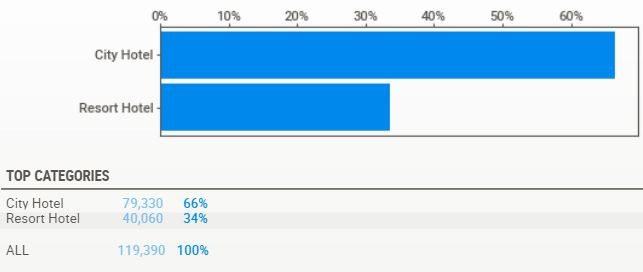

**Observation**

City Hotel has more number of bookings, it has 66%  bookings while resort hotel has 34%.






**2) is_canceled**

Value indicates wheather booking was cancelled or not.

**Distinct** **values**



1.   0 -> Not Cancelled
2.   1 -> Cancelled


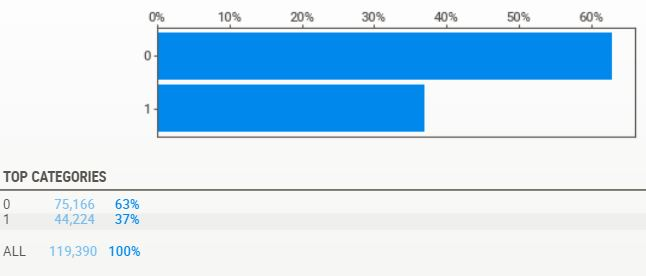


**Observation**

37% of the bookings were cancelled.



**3) lead_time**

Number of days elasped between booking date to the arrival date

**4) arrival_date_year**

Year of arrival 


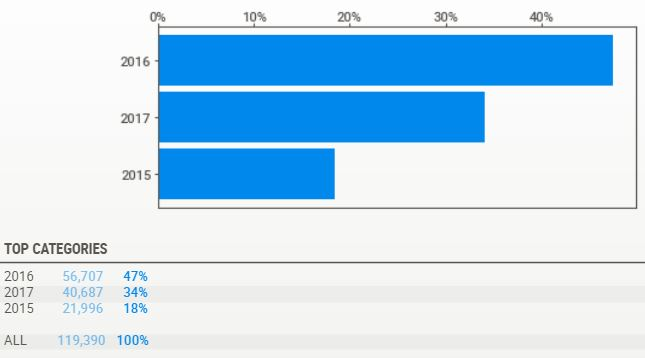


**observation**


There is 29% growth in the bookings in 2016(47%) that is more than a double comapared to previous year(2015 -> 18%) but the bookings decreased by 13% next year(2017 -> 34%).


**5**)**arrival_date_month**

Month of arrival

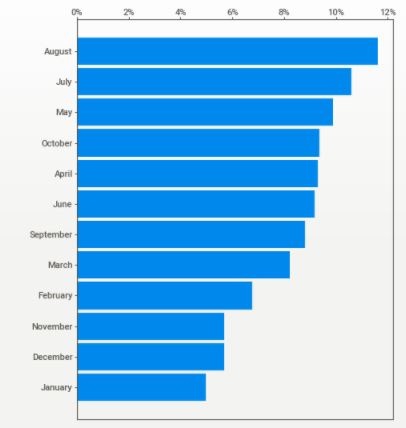

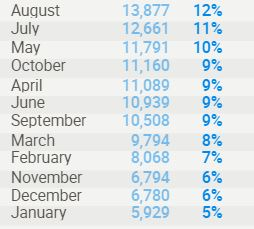


**observation**

Most bookings were made in August and July and least bookings were made at start and end of the year.


**6**)**arrival_date_week_number**

Week Number of the year for arrival date

**7**)**arrival_date_day_of_month**

Day of arrival


**8)** **stays_in_weekend_nights**

Number of weekend nights (Sat/Sun) booked to stay at the hotel.


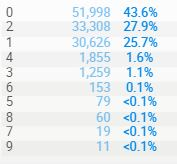


**Observation**
Customers usually booked for 1 or 2 weekend nights if stayed at the hotel in the weekends




**9) stays_in_week_nights**

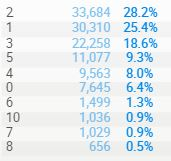

**Observation**

Customers usually booked for 1,2 or 3 week nights.

**10) adults**

Number of adults

**11) children**

Number of children

**12) babies**

Number of babies

**13) meal**

Type of meal booked


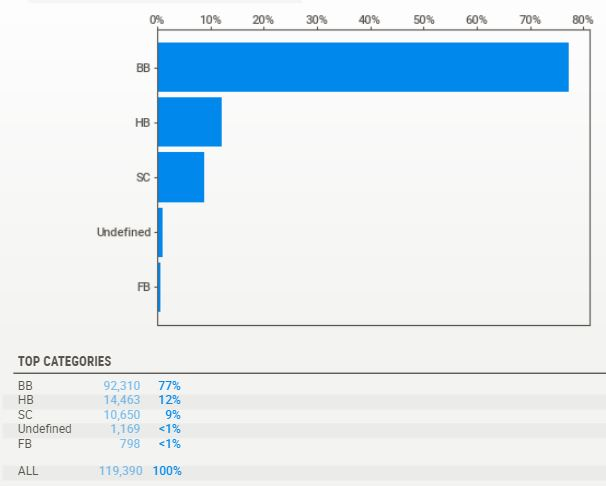

1.  BB – Bed & Breakfast


2.   HB – Half board (breakfast and one other meal – usually dinner)

3.  FB – Full board (breakfast, lunch and dinner)
 
4.  SC – no meal package
 

**Observation**


BB is the most common meal package.

**14) country**

country of origin.


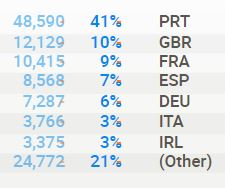

**Observation**


Most guests comes from Europe. Portugal, UK, France, Spain and Germany are the top countries from most guests come, more than 70% come from these 5 countries. 



**15) market_segment**

Group of people who share one or more common characteristics, lumped together for marketing purposes.

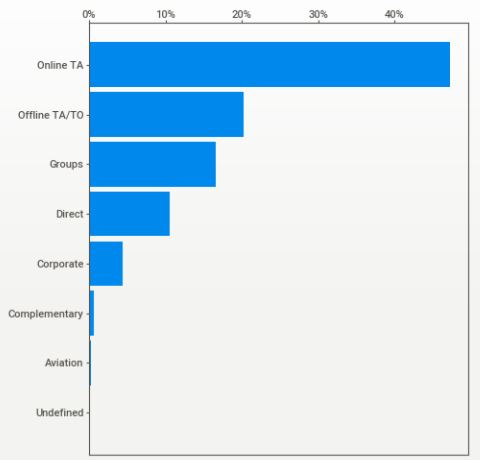


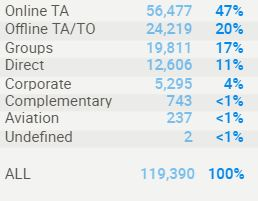


**Observation**


Most of the bookings were made online.



**16) distribution_channel**

A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer

**17)is_repeated_guest**

Value indicates if the booking name was from repeated guest



1.   0 -> Not a Repeated guest
2.   1 -> Repeated Guest

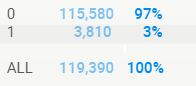



**observation**

Repeated Guest rate is 3%

**18) previous_cancelations**

Number of previous bookings that were cancelled by the customer prior to the current booking

**19) previous_booking_not_cancelled**


 Number of previous booking not canceled prior to current booking

 **20) reserved_room_type**

 Code of room type reserved.


 **21) assigned_room_type**

 Code of assigned room type.

 **22) booking_changes**

 Number of booking changes made

 **23)deposit_type**

 Type of deposit made by the customer for the reservation.

 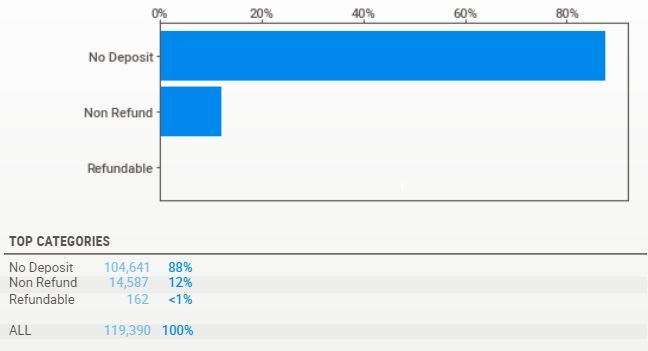

 **Observation**

 Most of the hotels are keeping deposit mandatory.

**24) agent**

ID of the travel agency that made the booking.

**25) company**

ID of the company that made the booking or is responsible for payment.

**26) days_in_waiting_list**

Number of days the booking was in the waiting list before it was confirmed.

**27) customer_type**

Type of booking.


1.   Contract -> when the booking has an allotment or other type of contract associated to it


2.   Group –> when the booking is associated to a group

3.   Transient –> when the booking is not part of a group or contract, and is not associated to other transient booking

4.   Transient-party –> when the booking is transient, but is associated to  other transient booking

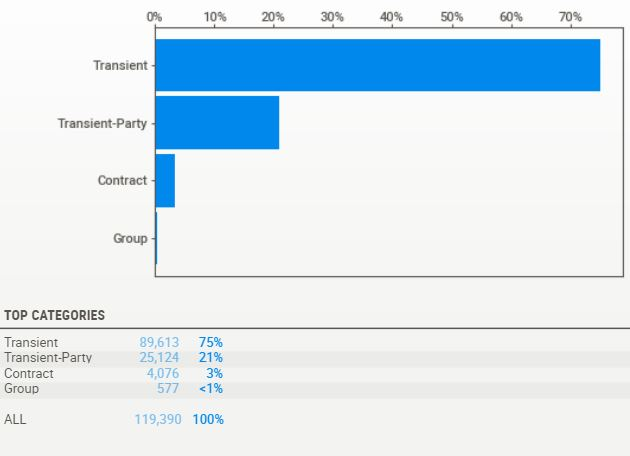

**Observation**

Most of the bookings were of transient type.






**28) adr**

Average Daily Rate (the sum of transactions divided by the Total number of nights stayed)

**29) required_car_parking_spaces**

Number of car parking spaces required by the customer.

**30) total_of_special_requests**

Number of special requests made by the customer.

**31) reservation_status**

Last reservation status 

1.   Canceled –> booking was canceled by the customer
2.   Check-Out –> customer has checked in and already departed
3.   No-Show –> customer did not check-in and did inform the hotel of the reason why

**22) reservation_status_date**

Date at which the last status was set. 








**Summary:**

1)City Hotel has more number of bookings, it has 66%  bookings while resort hotel has 34%.

2) 37% of the bookings were cancelled.

3)There is 29% growth in the bookings in 2016(47%) that is more than a double comapared to previous year(2015 -> 18%) but the bookings decreased by 13% next year(2017 -> 34%).

4)Most bookings were made in August and July and least bookings were made at start and end of the year.

5)Customers usually booked for 1 or 2 weekend nights if stayed at the hotel in the weekends.

6) Customers usually booked for 1,2 or 3 week nights.

7)BB is the most common meal package.

8)Most guests comes from Europe. Portugal, UK, France, Spain and Germany are the top countries from most guests come, more than 70% come from these 5 countries. 

9) Most of the bookings were made online.

10) Repeated Guest rate if 3%.

11)Most of the hotels are not keeping deposit mandatory.

12)Most of the bookings were of transient type.

**Note:**

All the visualization are taken from the sweetviz analysis 



#**Data** **Cleaning**

In [ ]:
#Checking for null values
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

Company , agent, country, children columns has null values. 

In [ ]:
#Replacing missing values
df[['company','agent','children']] = df[['company','agent','children']].fillna(0)
df['country'].fillna('Unknown', inplace = True)

In [ ]:
#Checking the missing values after filling and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:

#Converting some features from float to integers

df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
#Now we remove all those entries where there are no guests

no_guests = list(df[(df.adults + df.babies + df.children)==0].index)

df.drop(df.index[no_guests], inplace = True)

df.shape

(119210, 32)

In [ ]:
#Filling the undefined categories with mode
df.loc[df['meal']=='Undefined', 'meal'] = df.meal.mode()[0]

df.loc[df['market_segment']=='Undefined', 'market_segment'] = df.market_segment.mode()[0]
df.loc[df['distribution_channel']=='Undefined', 'distribution_channel'] = df.distribution_channel.mode()[0]


In [ ]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

In [ ]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [ ]:
#Univariant analysis
#Descriptional statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Function to return the percentages of value counts and printing value counts
def get_percentage(vc,output=True):
  out=[]
  if output:
    print(vc)
  for category_val in vc:
    out.append(category_val/vc.sum()*100)
  return out


#**1) Which type of Hotel is more likely to cancel?**

In [ ]:
# Dataframe which contains only city hotel bookings
df_city_hotel = df[df['hotel']=='City Hotel']
# Dataframe which contains only resort hotel bookings
df_resort_hotel = df[df['hotel']=='Resort Hotel']


 CITY HOTEL CANCELLATION PERCENTAGE


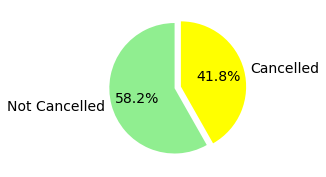

In [ ]:
# Convert value counts to list
sizes = df_city_hotel.groupby('hotel')['is_canceled'].value_counts().tolist()
plt.rcParams["figure.figsize"] = (3,3)

explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightgreen','yellow']

plt.pie(sizes, explode=explode, labels=['Not Cancelled','Cancelled'], colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
print('\n City Hotel Cancellation Percentage'.upper())


 RESORT HOTEL CANCELLATION PERCENTAGE


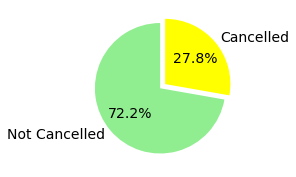

In [ ]:
# Convert value counts to list
sizes = df_resort_hotel.groupby('hotel')['is_canceled'].value_counts().tolist()

explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightgreen','yellow']

plt.pie(sizes, explode=explode, labels=['Not Cancelled','Cancelled'], colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
print('\n Resort Hotel Cancellation Percentage'.upper())

City Hotels has the cancelation percentage of 41.7% and resort hotels has 28% i.e city hotels are more likely to get cancelled and resort hotels are less likely to get cancelled, while the overall cancelation percentage is 37%.

#**2) How far in advance customers book hotels?**

In [132]:
# Creating a separate datafrme for lead time analysis
df_lead_time_bookings = df[['is_canceled','lead_time']]
 
#Adding a column of lead_time_bin which determines the time period to arrive at the hotel
bins = np.arange(0,737,30)
df_lead_time_bookings['lead_time_in_months'] = np.searchsorted(bins, df_lead_time_bookings['lead_time'].values)
df_lead_time_bookings.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,is_canceled,lead_time,lead_time_in_months
0,0,342,12
1,0,737,25
2,0,7,1
3,0,13,1
4,0,14,1


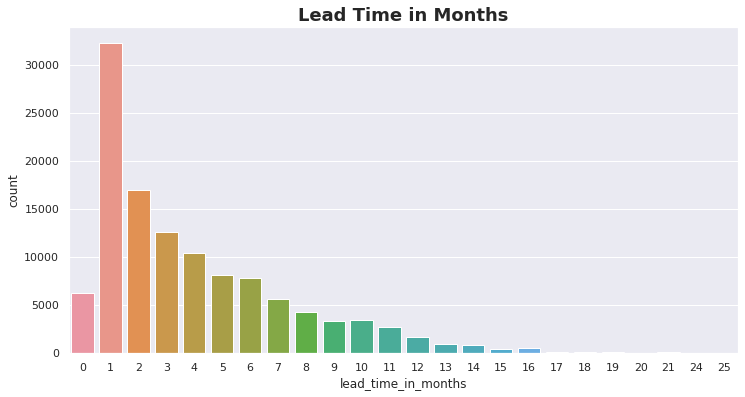

In [133]:
plt.rcParams["figure.figsize"] = (12,6)
sns.set_theme(style="darkgrid")
plt.title('Lead Time in Months', fontsize = 18, fontweight='bold')
sns.countplot(data=df_lead_time_bookings,x='lead_time_in_months')

**Most of the customers book hotels 1 or 2 months prior to the arrival.**

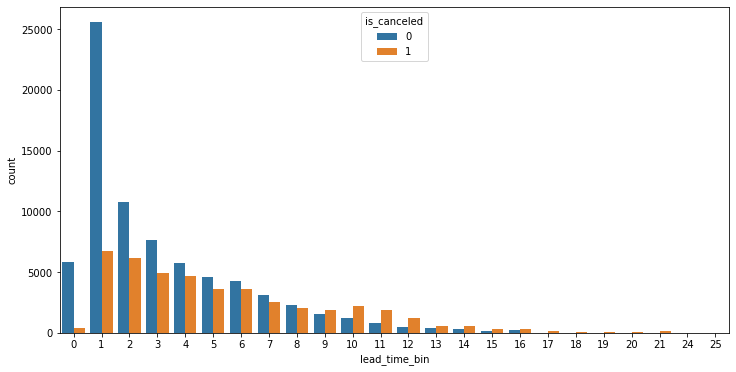

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(x='lead_time_bin',data=df,hue='is_canceled')


#**3) Which type of market_segment bookings are most likely to get cancelled?**

In [125]:
df.groupby('market_segment')['is_canceled'].value_counts(normalize=True)*100

market_segment  is_canceled
Aviation        0              77.872340
                1              22.127660
Complementary   0              87.774725
                1              12.225275
Corporate       0              81.238167
                1              18.761833
Direct          0              84.628835
                1              15.371165
Groups          1              61.108585
                0              38.891415
Offline TA/TO   0              65.668679
                1              34.331321
Online TA       0              63.238787
                1              36.761213
Name: is_canceled, dtype: float64

In [ ]:
for cat in df.market_segment.unique():
    try:
        
        print('\n',cat.upper(),'\n')
        print(get_percentage(df.loc[df.market_segment==cat].groupby('market_segment')['is_canceled'].value_counts()))
    except:
        continue


 DIRECT 

market_segment  is_canceled
Direct          0              10648
                1               1934
Name: is_canceled, dtype: int64
[84.62883484342711, 15.371165156572882]

 CORPORATE 

market_segment  is_canceled
Corporate       0              4291
                1               991
Name: is_canceled, dtype: int64
[81.23816736084817, 18.761832639151837]

 ONLINE TA 

market_segment  is_canceled
Online TA       0              35673
                1              20737
Name: is_canceled, dtype: int64
[63.238787449033865, 36.761212550966135]

 OFFLINE TA/TO 

market_segment  is_canceled
Offline TA/TO   0              15880
                1               8302
Name: is_canceled, dtype: int64
[65.66867918286329, 34.331320817136714]

 COMPLEMENTARY 

market_segment  is_canceled
Complementary   0              639
                1               89
Name: is_canceled, dtype: int64
[87.77472527472527, 12.225274725274724]

 GROUPS 

market_segment  is_canceled
Groups          1    

In [ ]:
ms_ic = pd.DataFrame()
for cat in df.market_segment.unique():
    print((df.loc[df.market_segment==cat].groupby('market_segment')['is_canceled'].value_counts(normalize=True)*100).to_frame())
    

                            is_canceled
market_segment is_canceled             
Direct         0              84.628835
               1              15.371165
                            is_canceled
market_segment is_canceled             
Corporate      0              81.238167
               1              18.761833
                            is_canceled
market_segment is_canceled             
Online TA      0              63.238787
               1              36.761213
                            is_canceled
market_segment is_canceled             
Offline TA/TO  0              65.668679
               1              34.331321
                            is_canceled
market_segment is_canceled             
Complementary  0              87.774725
               1              12.225275
                            is_canceled
market_segment is_canceled             
Groups         1              61.108585
               0              38.891415
                            is_canceled


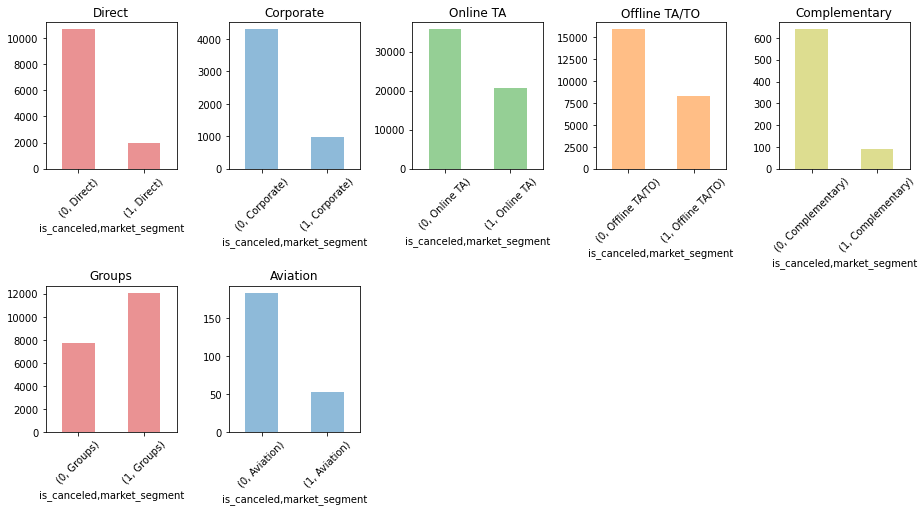

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.market_segment.unique()):
  plt.subplot(4,5,i+1)
  plt.title(cat)
  df.loc[df.market_segment==cat].groupby('is_canceled')['market_segment'].value_counts().plot(kind='bar',color=colors[i%5],alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

Text(0.5, 0, 'Market Segment')

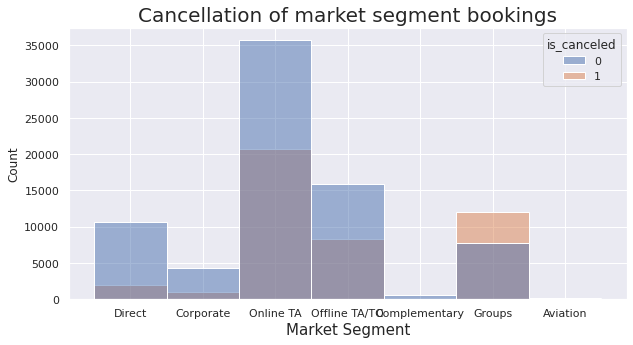

In [139]:
plt.figure(figsize=(10,5))
sns.histplot(x='market_segment',data=df,hue='is_canceled')
plt.title("Cancellation of market segment bookings",fontsize=20)
plt.xlabel("Market Segment",fontsize=15)

**Bookings through groups(61%) and online TA(36.7%) market_segment are more likely to get cancelled.**

#**4) Bookings from market_segment across years**

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

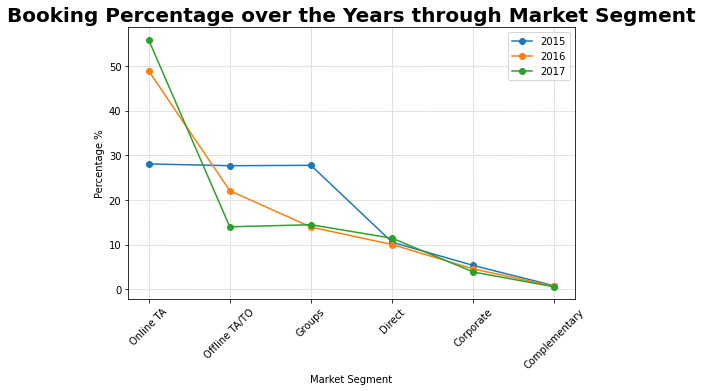

In [ ]:
# Setting the size of the plot
plt.rcParams["figure.figsize"] = (8,5)
# sorting the labels in the order for the plot
texts = sorted(df.market_segment.unique(),reverse=True)
texts = texts[:-1]
labels = ['0']
labels.extend(texts)

fig,ax = plt.subplots()
for year in df.arrival_date_year.unique():
    ax.plot(get_percentage(df.loc[df.arrival_date_year==year].groupby('arrival_date_year')['market_segment'].value_counts().sort_index(ascending=False).head(6),False),label=year,marker='o')
    leg = ax.legend()
    ax.set_xticklabels(labels)
plt.xlabel('Market Segment')
plt.ylabel('Percentage %')
plt.title('Booking Percentage over the Years through Market Segment',fontsize=20, fontweight = 'bold')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=45)# Will rotatte xlabels 45 degrees

    

**Online Bookings are increasing over the years (28.03% in 2015 to 48.79% in 2016 to 55.68% in 2017).**

#**7) Which type of customers are more repeated guests?**

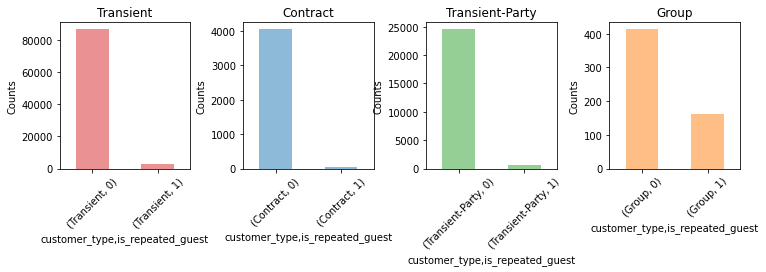

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,5,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('customer_type')['is_repeated_guest'].value_counts().plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

In [ ]:
# printing percentage of repeted guest of different types of customers
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(df.loc[df.customer_type==type].groupby('customer_type')['is_repeated_guest'].value_counts(normalize=True)*100)


 TRANSIENT 

customer_type  is_repeated_guest
Transient      0                    96.623676
               1                     3.376324
Name: is_repeated_guest, dtype: float64

 CONTRACT 

customer_type  is_repeated_guest
Contract       0                    99.238703
               1                     0.761297
Name: is_repeated_guest, dtype: float64

 TRANSIENT-PARTY 

customer_type    is_repeated_guest
Transient-Party  0                    97.839605
                 1                     2.160395
Name: is_repeated_guest, dtype: float64

 GROUP 

customer_type  is_repeated_guest
Group          0                    71.95122
               1                    28.04878
Name: is_repeated_guest, dtype: float64


**Group Customers(28%) are more repeated guests and contract(0.76%) are less repeated.**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_bin'],
      dtype='object')

#**8) Which type of customers are more likely to put a special request?**

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['total_of_special_requests'].value_counts()))


 TRANSIENT 

customer_type  total_of_special_requests
Transient      0                            49246
               1                            26743
               2                            11037
               3                             2121
               4                              300
               5                               29
Name: total_of_special_requests, dtype: int64
[55.0382225401225, 29.88846171040279, 12.335151325495104, 2.3704680584737807, 0.3352854396709732, 0.03241092583486074]

 CONTRACT 

customer_type  total_of_special_requests
Contract       0                            2104
               1                            1121
               2                             709
               3                             128
               4                               6
               5                               4
Name: total_of_special_requests, dtype: int64
[51.66994106090373, 27.529469548133594, 17.411591355599214, 3.143418467583497, 0.14734

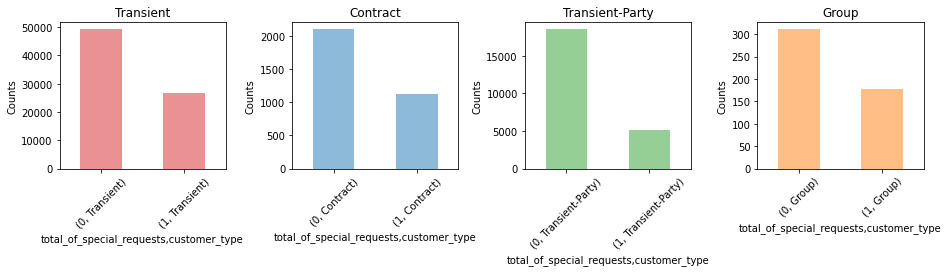

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,4,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('total_of_special_requests')['customer_type'].value_counts().head(2).plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

**Group and transient customers are more likely puts a special request.**

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['required_car_parking_spaces'].value_counts()))


 TRANSIENT 

customer_type  required_car_parking_spaces
Transient      0                              83063
               1                               6395
               2                                 16
               3                                  2
Name: required_car_parking_spaces, dtype: int64
[92.83271491796683, 7.147167955652913, 0.017881890115785237, 0.0022352362644731546]

 CONTRACT 

customer_type  required_car_parking_spaces
Contract       0                              3938
               1                               133
               2                                 1
Name: required_car_parking_spaces, dtype: int64
[96.70923379174853, 3.266208251473477, 0.02455795677799607]

 TRANSIENT-PARTY 

customer_type    required_car_parking_spaces
Transient-Party  0                              24277
                 1                                797
                 2                                 11
                 8                                  2
     

**Transient and group people requires more parking spaces**

#**10) Waiting List over the year**

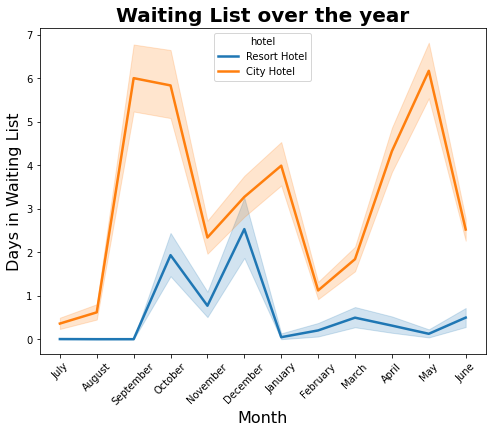

In [ ]:
# setting the figure size
plt.figure(figsize=(8, 6))

sns.lineplot(x = "arrival_date_month", y="days_in_waiting_list", hue="hotel", data=df, size="hotel", sizes=(2.5, 2.5))
plt.title("Waiting List over the year", fontsize=20, fontweight = 'bold')
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Days in Waiting List", fontsize=16)
plt.show()

**City Hotels have high waiting list in spring and autumn. While resort hotels has high waiting list in winter.**

Text(0, 0.5, 'Days in waiting list')

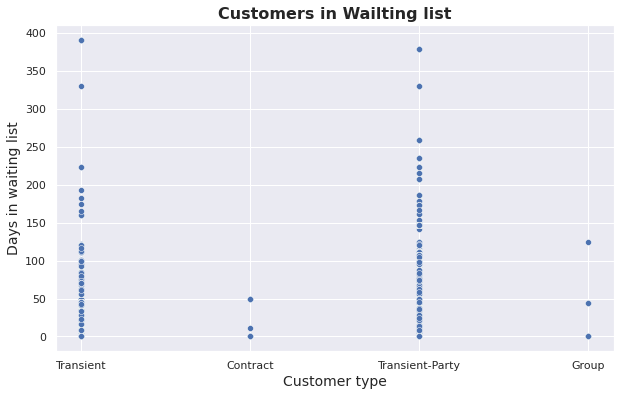

In [141]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "customer_type", y="days_in_waiting_list", data=df)
plt.title("Customers in Wailting list",fontsize=16,fontweight='bold')
plt.xlabel("Customer type",fontsize=14)
plt.ylabel("Days in waiting list",fontsize=14)

**Transient and transient party customers are mostly in waiting list before booking confirmation.**

#**Cancellation when special request is raised**

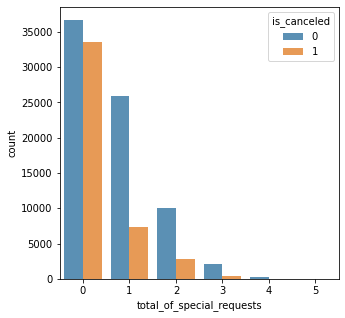

In [105]:
plt.rcParams["figure.figsize"] = (5,5)
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled',alpha=0.8)

**The Cancellations are less in number when a special request is raised**

#**Cancellation when parking spaces are required**

In [103]:
df.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize=True)*100

required_car_parking_spaces  is_canceled
0                            0               60.466364
                             1               39.533636
1                            0              100.000000
2                            0              100.000000
3                            0              100.000000
8                            0              100.000000
Name: is_canceled, dtype: float64

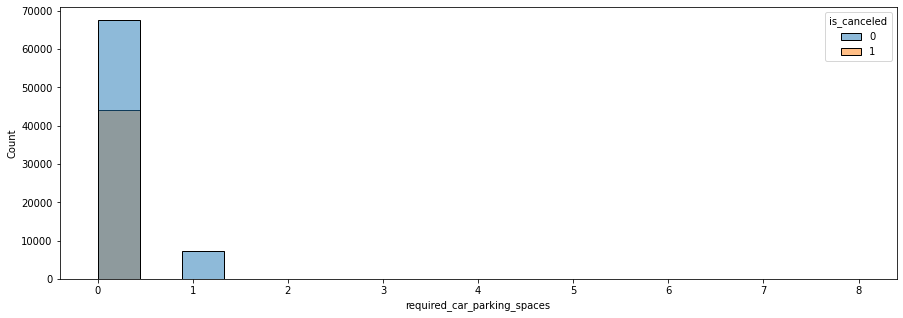

In [99]:
#required_car_parking_spaces
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='required_car_parking_spaces',hue='is_canceled')


In [114]:
df_previous_cancelled = df[['is_canceled','previous_cancellations']]
df_previous_cancelled['previous_cancelled'] = df['previous_cancellations']>1
df_previous_cancelled.loc[df['previous_cancellations']>1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,is_canceled,previous_cancellations,previous_cancelled
13951,0,2,True
13952,0,2,True
13953,0,2,True
13954,0,2,True
13955,0,2,True
...,...,...,...
94396,0,5,True
94397,0,5,True
94398,0,5,True
94399,0,5,True


In [ ]:
df.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize=True)*100

#Summary

**Dataset Analysis**

1)City Hotel has more number of bookings, it has 66%  bookings while resort hotel has 34%.

2) 37% of the bookings were cancelled.

3)There is 29% growth in the bookings in 2016(47%) that is more than a double comapared to previous year(2015 -> 18%) but the bookings decreased by 13% next year(2017 -> 34%).

4)Most bookings were made in August and July and least bookings were made at start and end of the year.

5)Customers usually booked for 1 or 2 weekend nights if stayed at the hotel in the weekends.

6) Customers usually booked for 1,2 or 3 week nights.

7)BB is the most common meal package.

8)Most guests comes from Europe. Portugal, UK, France, Spain and Germany are the top countries from most guests come, more than 70% come from these 5 countries. 

9) Most of the bookings were made online.

10) Repeated Guest rate if 3%.

11)Most of the hotels are not keeping deposit mandatory.

12)Most of the bookings were of transient type.






**1) Which type of Hotel is more likely to cancel?**

A)City Hotels has the cancelation percentage of 41.7% and resort hotels has 28% i.e city hotels are more likely to get cancelled and resort hotels are less likely to get cancelled, while the overall cancelation percentage is 37%.

**2) How far in advance customers book hotels?**

A)Most of the customers book hotels 1 or 2 months prior to the arrival.

**3) Most popular meal package across hotels?**

A)BB is the most popular meal in city hotels while BB and HB are popular in resort hotels.

**4) Which type of market_segment bookings are most likely to get cancelled?**

A)Bookings through groups(61%) and online TA(36.7%) market_segment are more likely to get cancelled.

**5) Bookings from market_segment across years**

A)Online Bookings are increasing over the years (28.03% in 2015 to 48.79% in 2016 to 55.68% in 2017).

**6) Bookings from which distribution channel are more sucessful and which has more cancellation percentage?**

A)Bookings from direct distribution channel are highly sucessfull and TA/TO has highest cancellation percentage.

**7) How likely repeated guest is going to cancel booking?**

A)Repeated Guest is less likely(6.2%) to cancel the booking and in resort hotel booking cancellation is very less likely. while city hotel has cancellation rate of 22.2%.


**8) Which deposit type is more likey to get cancelled and which type is less likely to get cancelled?**

A)Non refundable deposits(0.6%) are less likey to get cancelled, whereas no deposit(28.4%) and refundable(22.2%) ones are more likely to get cancelled.


**9) Which type of customers are most likely to cancel the booking?**

A)Transient and contract customers are most likely to cancel the booking.

**10)Preference hotels of different customers**

**11) Prefered bookings of different customers?**

A)Transient customers prefers Online TA while all others prefers Offline.

**12) Which type of customers are more repeated guests?**

A) Group Customers(28%) are more repeated guests and contract(0.76%) are less repeated.

**13) Which type of customers are more likely to put a special request?**

A)Group and transient customers are more likely puts a special request.

**14) Bookings of diffrent customers across months?**

A)Contract customer usually books in sept and oct, group in oct and nov,transient in aug and july, transient_party in oct and sept.


In [ ]:
country_visitors = df.groupby(['country']).size().reset_index(name = 'count')

import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

#Heat Map

In [100]:
df_heatmap = df[['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                    'booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

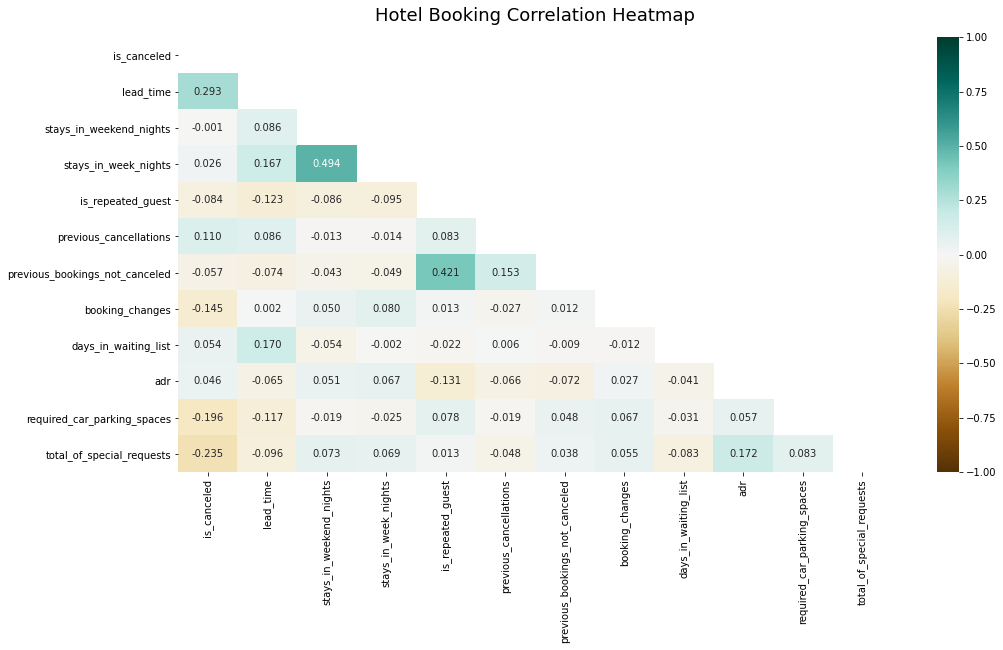

In [102]:
plt.figure(figsize=(16, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_heatmap.corr(), dtype=np.bool))
#fmt will restrict the decimal places in map
heatmap = sns.heatmap(df_heatmap.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt='.3f')
heatmap.set_title('Hotel Booking Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

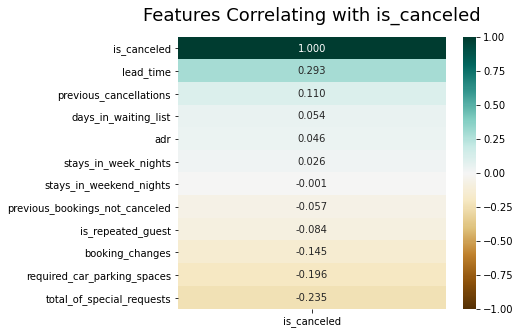

In [130]:
plt.figure(figsize=(6, 5))
heatmap = sns.heatmap(df_heatmap.corr()[['is_canceled']].sort_values(by='is_canceled',ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt='.3f')
heatmap.set_title('Features Correlating with is_canceled', fontdict={'fontsize':18}, pad=16);

In [ ]:
# correlated_features = set()
# correlation_matrix = df.corr()
# for i in range(len(correlation_matrix .columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.7:
#             colname = correlation_matrix.columns[i]
#             correlated_features.add(colname)

As lead_time_bin is derived from lead_time we can say that all features are **independent** from each other.